# Section 1 : Loading and cleaning data

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform

%matplotlib inline

## Disovering the data 

Before going through any assumptions, lets open all of the csv files to discover what are the available data and how are those data arranged.

## Content 

This file contains the informations about the game such as the name of the game, the release data,tags,...
It will be one of the m,ain file that we will use during our project

In [2]:
pd_content = pd.read_csv(os.getcwd() + '/steam-store-games/steam.csv')
pd_content['steam_appid'] = pd_content['appid'] 
pd_content = pd_content.drop(columns = ['appid'])
pd_content['grade'] = pd_content['positive_ratings']/(pd_content['positive_ratings']+ pd_content['negative_ratings'])#[content['positive_ratings']/(content['positive_ratings'] + content['negative_ratings']) for content in pd_content]

pd_content.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,steam_appid,grade
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,10,0.973888
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,20,0.839787
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,30,0.895648
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,40,0.826623
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,50,0.947996


## Description 

This file contain a small abstrract and a long description of the games. This file will have to be pre-processed to extract some useful features.

In [3]:
pd_description = pd.read_csv(os.getcwd() + '/steam-store-games/steam_description_data.csv')
pd_description.head()

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


## Media type

Type of media supported by the video game and the minimum requirement of such a game.

In [4]:
pd_media = pd.read_csv(os.getcwd() + '/steam-store-games/steam_media_data.csv')
pd_media.head()

,steam_appid,header_image,screenshots,background,movies
0,10,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN
1,20,https://steamcdn-a.akamaihd.net/steam/apps/20/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,NaN
2,30,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,NaN
3,40,https://steamcdn-a.akamaihd.net/steam/apps/40/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN
4,50,https://steamcdn-a.akamaihd.net/steam/apps/50/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,NaN


## Requirements

The minimal requirement for each game

In [5]:
pd_requirements = pd.read_csv(os.getcwd() + '/steam-store-games/steam_requirements_data.csv')
pd_requirements.head()

,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


## Support

Type of support, website of the company creating/ hosing§ the game

In [6]:
pd_support = pd.read_csv(os.getcwd() + '/steam-store-games/steam_support_info.csv')
pd_support.head()

,steam_appid,website,support_url,support_email
0,10,NaN,http://steamcommunity.com/app/10,NaN
1,30,http://www.dayofdefeat.com/,NaN,NaN
2,50,NaN,https://help.steampowered.com,NaN
3,70,http://www.half-life.com/,http://steamcommunity.com/app/70,NaN
4,80,NaN,http://steamcommunity.com/app/80,NaN


## Tags

Tags of the game. The more upvote a type ge,m the more accuratre this tag is. This could be one of the feature of our network but it requires the processing of the keypoints before anything else.

In [7]:
pd_tag = pd.read_csv(os.getcwd() + '/steam-store-games/steamspy_tag_data.csv')
pd_tag.head()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pre-Processing

Here, we convert the date into the month and year

In [8]:
#int(pd_content['release_date'][][:-6])
month = []
year = []
for date in pd_content['release_date'].values:
    year.append(int(date[:-6]))
    month.append(int(date[5:-3]))

In [9]:
pd_content['month'] = month
pd_content['year'] = year

### Realase month for games (all year mixed)

In [10]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 20})


def print_bar_plot(dict, figsize=(25,10), labels=["axis0", "axis1"], ticksize =20):
    plt.figure(figsize=figsize)
    plt.bar(dict.unique(), dict.value_counts()[dict.unique()], width=0.5)

    for index, i in enumerate((dict.unique())):
        v =  dict.value_counts()[i]
        if (type(i) == str):
            plt.text(index-.25, v*(1.05), str(v), color='black', fontweight='bold')
        else : 
            plt.text(i-.25, v*(1.05), str(v), color='black', fontweight='bold')
    plt.xlabel(labels[0])
    plt.xticks(dict.unique(), fontsize=ticksize)
    plt.ylabel(labels[1])
    plt.ylim(0,max(dict.value_counts())*1.1)
    
    plt.show()

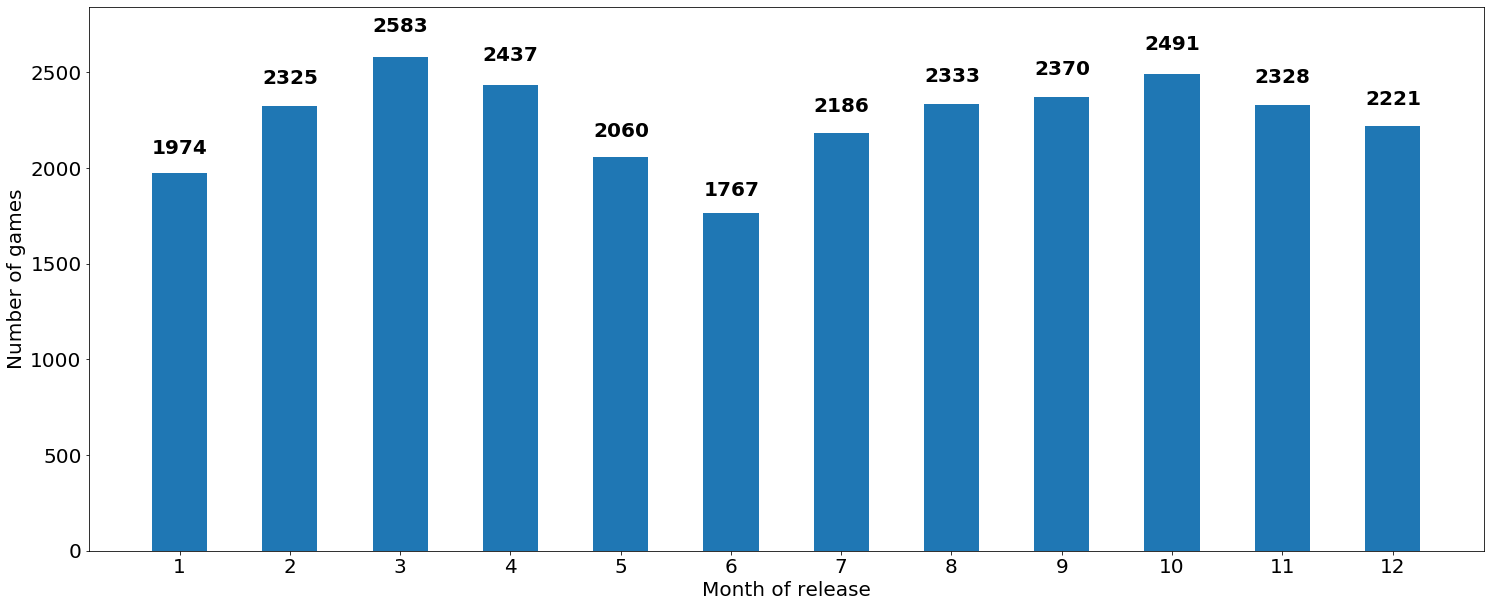

In [11]:
print_bar_plot(pd_content["month"], figsize=(25,10), labels= ["Month of release", "Number of games"])

Some months are prefered to release games. Those values are from all the games on the platform but the number of recent games shows a behavior that is to release games before christmas and in january.

### Realase year for games (all year mixed)

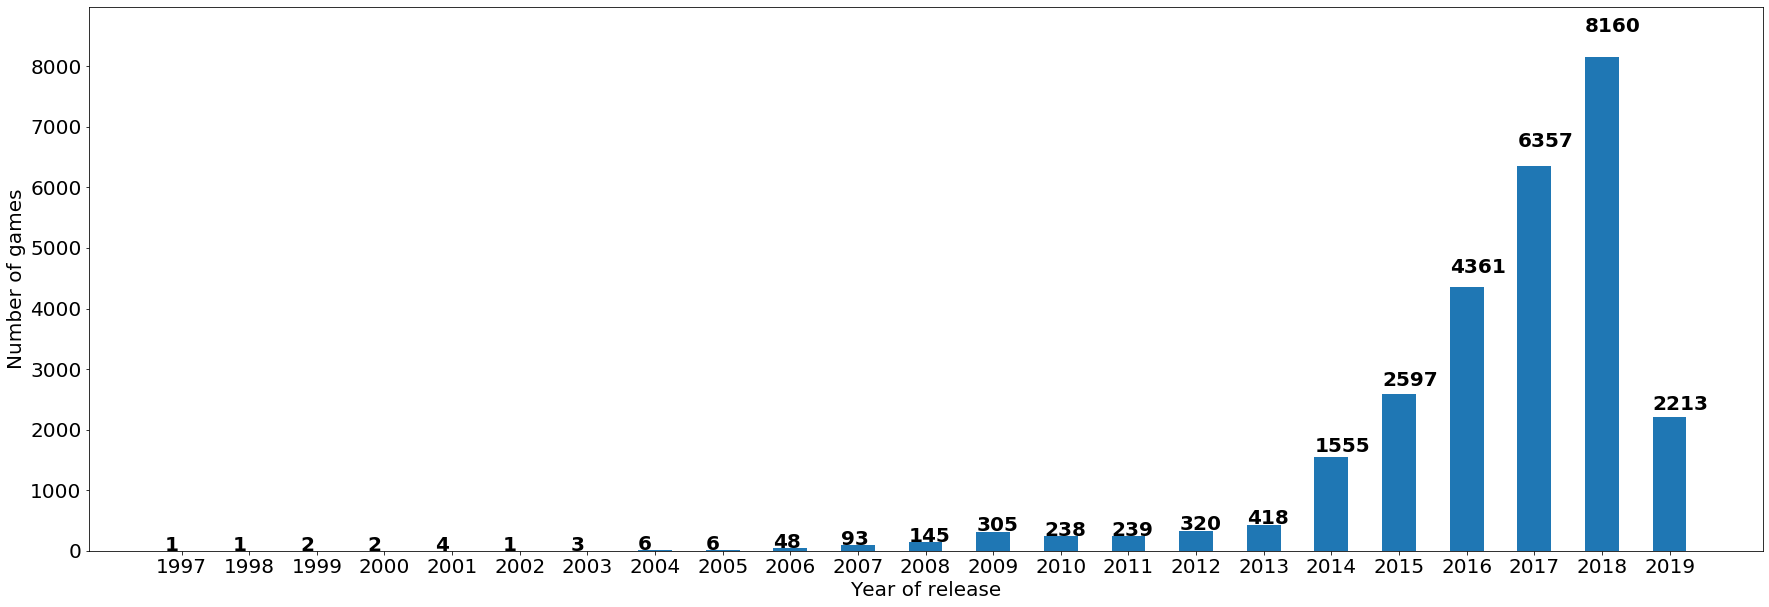

In [12]:
print_bar_plot(pd_content['year'], figsize=(30,10), labels = ["Year of release", "Number of games"])

Shows that more and more games are being produced over the years

### Number of owners for games

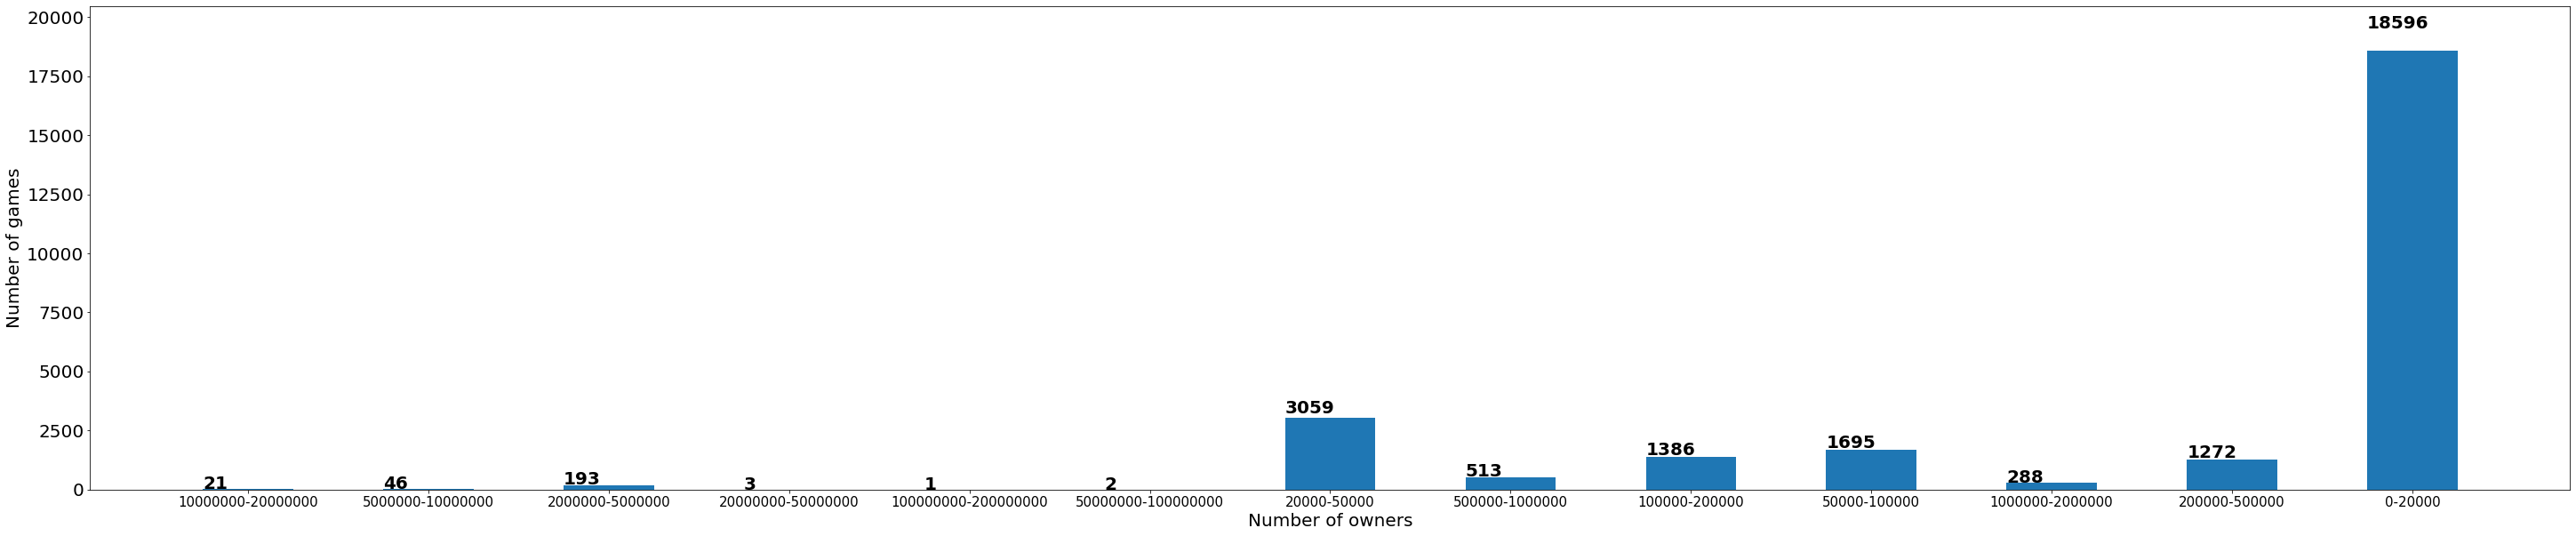

In [13]:
#plt.hist(pd_content['owners'].value_counts())
matplotlib.rcParams.update({'font.size': 20})

print_bar_plot(pd_content['owners'], figsize=(50,10), labels = ["Number of owners", "Number of games"], ticksize = 15)

2 types of games : heavy sold games and "niche" games with a low market and fewer customers

### Number of game per studio on steam

In [14]:
pd_content['developer'].value_counts()

Choice of Games                          94
KOEI TECMO GAMES CO., LTD.               72
Ripknot Systems                          62
Laush Dmitriy Sergeevich                 51
Nikita "Ghost_RUS"                       50
Dexion Games                             45
RewindApp                                43
Hosted Games                             42
Blender Games                            40
Humongous Entertainment                  36
For Kids                                 36
EnsenaSoft                               35
Nekyau Games                             32
Eipix Entertainment                      32
Warfare Studios                          31
HeR Interactive                          30
MumboJumbo                               29
ERS G Studios                            28
Creobit                                  28
HexWar Games                             27
Sly                                      26
Valve                                    26
Milestone S.r.l.                

## Minimum requirements 

In [15]:
print(len(pd_requirements))


mem = []

numbers = [0,1,2,3,4,5,6,7,8,9]
count = 0
for requirement in pd_requirements['minimum']:
    #print(requirement)
    index = str(requirement).find("Memory:")
    if  index !=-1  and str(requirement).find("RAM")!=-1:
        
        
        stop = None
        number = ""
        
        for i,letter in enumerate(requirement[index+7:]):
            if letter.isnumeric() and i< 10:
                number+=letter
                stop = index+7+i
                
        for i,letter in enumerate(requirement[stop:]):
            
            if (stop is not None) and i< 3 and requirement[stop+1+i] in ["m","M","k","K","g","G"]:
                if(requirement[stop+1+i] in ["k","K"]):
                    number+="000000"
                if(requirement[stop+1+i] in ["m","M"]):
                    number+="000000"
                if(requirement[stop+1+i] in ["g","G"]):
                    number+="000000000"
        if number is not "" and int(number)<64e9 :
            #print((number))
            count +=1
            mem.append(int(number))
        else:
            mem.append(None)
    else:
        mem.append(None)
        
print(count)
print(len(mem))

27319
24293
27319


In [16]:
pd_requirements['min_RAM'] = mem

/Users/michaelhodara/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michaelhodara/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.6746e+04, 5.5310e+03, 1.9040e+03, 2.1000e+01, 7.9000e+01,
        1.0000e+00, 3.0000e+00, 5.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0.00000e+00, 3.27680e+09, 6.55360e+09, 9.83040e+09, 1.31072e+10,
        1.63840e+10, 1.96608e+10, 2.29376e+10, 2.62144e+10, 2.94912e+10,
        3.27680e+10]),
 <a list of 10 Patch objects>)

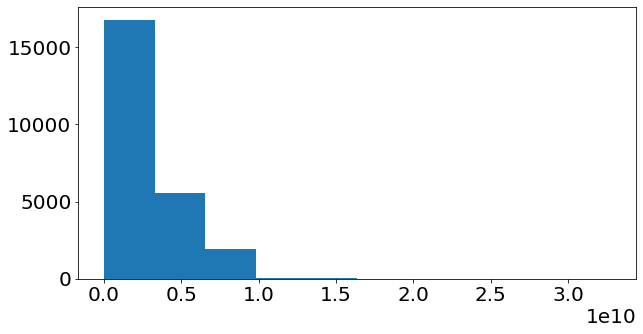

In [17]:
plt.figure(figsize=(10,5))
plt.hist(pd_requirements['min_RAM'])

### Number of systems supported 

In [18]:
pd_content['num_systems'] = [platform.count(';')+ 1 for platform in pd_content['platforms']]
pd_content.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,negative_ratings,average_playtime,median_playtime,owners,price,steam_appid,grade,month,year,num_systems
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,3339,17612,317,10000000-20000000,7.19,10,0.973888,11,2000,3
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,633,277,62,5000000-10000000,3.99,20,0.839787,4,1999,3
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,398,187,34,5000000-10000000,3.99,30,0.895648,5,2003,3
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,267,258,184,5000000-10000000,3.99,40,0.826623,6,2001,3
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,288,624,415,5000000-10000000,3.99,50,0.947996,11,1999,3


# Economic Success (per game):

Here, we just take the multiplication of the number of owners of the game times the price of the game.

In [19]:
a = np.array(list(map(int, pd_content['owners'][0].split('-')))).mean()

In [20]:
pd_content['economic_success'] = [price*np.array(list(map(int, owners.split('-')))).mean() for price, owners   in zip(pd_content['price'], pd_content['owners'])]
pd_content.head()


,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,average_playtime,median_playtime,owners,price,steam_appid,grade,month,year,num_systems,economic_success
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,17612,317,10000000-20000000,7.19,10,0.973888,11,2000,3,107850000.0
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,277,62,5000000-10000000,3.99,20,0.839787,4,1999,3,29925000.0
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,187,34,5000000-10000000,3.99,30,0.895648,5,2003,3,29925000.0
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,258,184,5000000-10000000,3.99,40,0.826623,6,2001,3,29925000.0
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,624,415,5000000-10000000,3.99,50,0.947996,11,1999,3,29925000.0


labels :  number of users, name, studio, genres
features : 

## Save data

Now, we need to define the output path of our data.

In [21]:
output_path = "./processed_data.csv"

In [22]:
pd_data = pd_content

In [23]:
pd_data1 = pd_content.set_index('steam_appid')
pd_data2 = pd_requirements
pd_data = pd_data2.join(pd_data1, on='steam_appid')

#print(pd_data['owners'].unique())
pd_data = pd_data.dropna()
#print(pd_data['owners'].unique())
#index = pd_data['owners'] == "null" #or pd_data['pc_requirements'] == "null"
#print(np.sum(index))
#pd_data = pd_data.drop([i for id in enumerate(index) if id ==True])

In [24]:
pd_data.to_csv(output_path)

## Dictionnary for genres and categories

The goal is to be able to breakdown all unique genres, and categories into column and understand better which games belongs to which genre or category.

In [25]:
import sys
from collections import Counter
np.set_printoptions(threshold=sys.maxsize)

In [26]:
pd_genres = pd_content['genres'].unique()
pd_categories = pd_content['categories'].unique()


In [27]:
count_cat = Counter(pd_categories)
#print(count_cat.most_common(10))
len(pd_categories)

3333

In [28]:
def dictionnary(full_vect):
    unique_vect = np.array([], dtype = 'object')
    word_complete = 1
    first = 1
    for i in range(0,len(full_vect)-1):
        for j in range(0,len(full_vect[i])):
            if(word_complete == 1):
                word_complete = 0
                word_to_analyze = ''
            if(j<len(full_vect[i])):
                char_to_analyze = full_vect[i][j]
            if (char_to_analyze == ';'):
                word_complete = 1
            elif(j == len(full_vect[i])-1):
                word_to_analyze = word_to_analyze + char_to_analyze
                word_complete = 1
            else:
                word_to_analyze = word_to_analyze + char_to_analyze
            if (word_complete == 1):
                if(first == 1):
                    unique_vect = np.append(unique_vect,word_to_analyze)
                    first = 0
                else:
                    match =0
                    for k in range(0,len(unique_vect)):
                        if(unique_vect[k] == word_to_analyze):
                            match = 1
                            break
                        else:
                            match = 0
                    if(match == 0 & first==0):
                        unique_vect = np.append(unique_vect,word_to_analyze)
    return unique_vect 

In [29]:
dictionnary(pd_categories)


array(['Multi-player', 'Online Multi-Player', 'Local Multi-Player',
       'Valve Anti-Cheat enabled', 'Single-player', 'Steam Cloud',
       'Steam Achievements', 'Steam Trading Cards', 'Captions available',
       'Partial Controller Support', 'Includes Source SDK',
       'Cross-Platform Multiplayer', 'Stats', 'Commentary available',
       'Includes level editor', 'Steam Workshop', 'In-App Purchases',
       'Co-op', 'Full controller support', 'Steam Leaderboards',
       'SteamVR Collectibles', 'Online Co-op', 'Shared/Split Screen',
       'Local Co-op', 'MMO', 'VR Support', 'Mods', 'Mods (require HL2)',
       'Steam Turn Notifications'], dtype=object)

In [30]:
dictionnary(pd_genres)

array(['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG',
       'Animation & Modeling', 'Video Production', 'Casual', 'Simulation',
       'Racing', 'Violent', 'Massively Multiplayer', 'Nudity', 'Sports',
       'Early Access', 'Gore', 'Utilities', 'Design & Illustration',
       'Web Publishing', 'Education', 'Software Training',
       'Sexual Content', 'Audio Production', 'Game Development',
       'Photo Editing', 'Accounting', 'Documentary', 'Tutorial'],
      dtype=object)